# Week 10: Single Value Decomposition

In this coding assignment, we will walk through an example of using Singular Value Decomposition (SVD) on a dataset of iris plants. Run the following cell to import the necessary packages. 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To begin, run the following cell to load the dataset into this notebook:
* `iris_data` will contain the raw data (shape 150 x 4). 
* `iris_dataframe` will contain the data in the form of a dataframe.

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris() # Loading the dataset

# Convert the dataset into a dataframe.
iris_dataframe = sns.load_dataset("iris")


Now, let's have a look at the first few rows of our dataframe. Observe the different attributes: sepal length, sepal width, petal length, petal width, and species.

In [ ]:
iris_dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's explore the data by creating a scatter matrix of our iris features. To do this, we'll create 2D scatter plots for every possible pair of our four features, classifying the datapoints by species. This should result in twelve total scatter plots in our scatter matrix, but we only need to consider the six below the diagonal, due to redundancy. Complete the following cell to generate the plot. 

Hint: you should be using `sns.pairplot` to create the scatter plots. Use only a single line of code. 

Text(0.5, 1.08, 'Scatter Matrix of Iris Features')

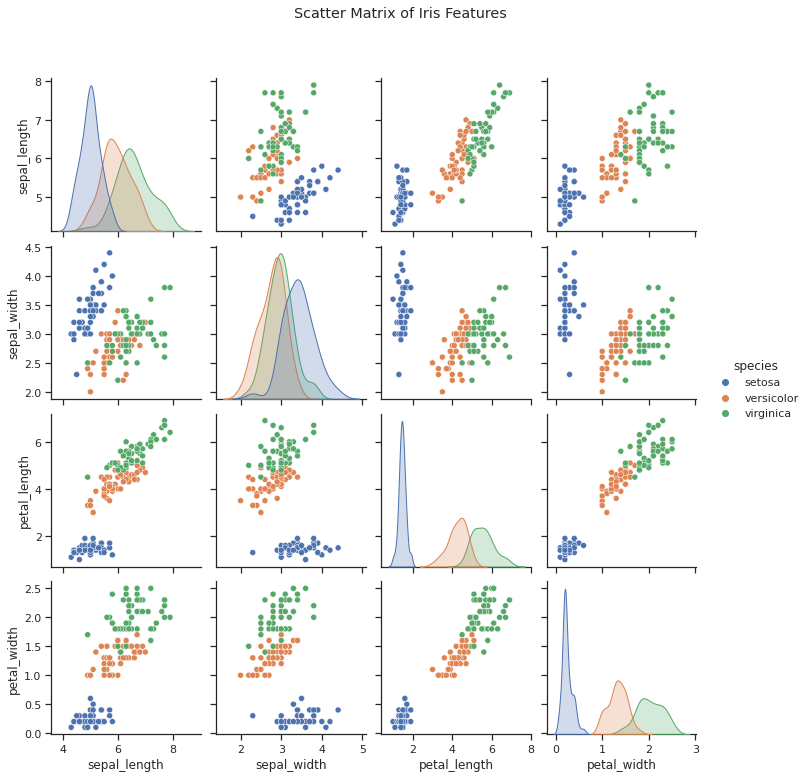

In [ ]:
sns.set_theme(style="ticks")
pairplots = sns.pairplot(iris_dataframe, hue = "species")
pairplots.fig.suptitle("Scatter Matrix of Iris Features", y=1.08)

To begin, we will be performing SVD on our matrix dataset. Recall that SVD decomposes a $m * n$ matrix $A$ into the matrix product $U\Sigma V^*$, where $V^* = V^T$. Enter the dimensions of $U$, $\Sigma$, and $V^*$ below. The dimensions of $A$ have been provided as an example.



In [ ]:
dimension_A = "m * n"
dimension_U = "m * m"
dimension_Sigma = "m * n"
dimension_VT = "n * n"

For convenience, we will be using `scikit-learn`'s `TruncatedSVD` module. Run the cell below to perform SVD on our iris dataset and obtain the singular values. Try changing the number of iterations and random states. 

In [ ]:
svd = TruncatedSVD(n_components=2, n_iter=10, random_state=50)
svd.fit(iris_data.data)  
print(svd.singular_values_)

[95.95991387 17.76103366]


Now, we obtain the matrix decomposition. Check the `sklearn` documentation for more information. 

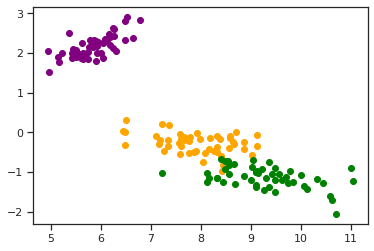

In [ ]:
U = svd.fit_transform(iris_data.data)
Sigma = svd.singular_values_
VT = svd.components_

x1 = U[:,0]
x2 = U[:,1]

color_directory = {iris_data.target_names[0]:"purple", iris_data.target_names[1]:"orange", iris_data.target_names[2]:"green"}

plt.figure()
for i in range(x1.shape[0]):

    color_index = iris_data.target_names[iris_data.target[i]]
    plt.scatter(x1[i].T,x2[i], color = color_directory[color_index])

plt.show()

You should be able to see the three species clusters clearly marked. 

Congratulations on completing an SVD analysis!